# Final ARIMA with forecasting results.
Transformation and scaling also performed
Model evaluated using RMSE,MSE,MAPE 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline

https://hands-on.cloud/using-the-arima-model-and-python-for-time-series-forecasting/#h-data-transformation-to-make-time-series-data-stationary---------

In [2]:
dataset = pd.read_excel("RBRTE Data.xlsx")

In [3]:
dataset

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8906,2022-06-21,118.51
8907,2022-06-22,115.54
8908,2022-06-23,114.50
8909,2022-06-24,117.36


In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'],infer_datetime_format=True) 
df = dataset.set_index(['Date'])

# printing
df.head(5)

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [5]:
# checking for null values
df.isnull().sum()

Price    0
dtype: int64

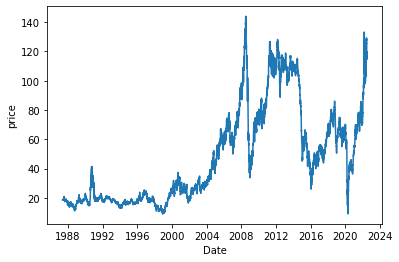

In [6]:
# labeling
plt.xlabel('Date')
plt.ylabel('price')

# plotting
plt.plot(df)
plt.show;

# Check if the time series is stationary

In [7]:
#Determine rolling statistics
rolmean = df.rolling(window=12).mean() 
rolstd = df.rolling(window=12).std()

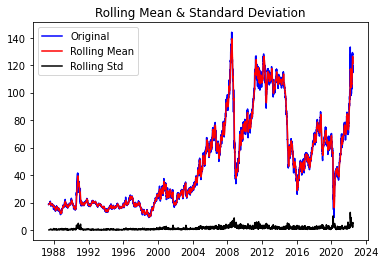

In [8]:
#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')

# labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Data transformation to make time-series data stationary

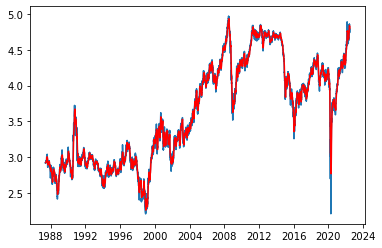

In [9]:
# importing the module
import numpy as np


#Estimating trend
logScale = np.log(df)

#The below transformation is required to make series stationary
movingAverage = logScale.rolling(window=12).mean()
movingSTD = logScale.rolling(window=12).std()

# plotting the graph
plt.plot(logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [10]:
# Trasformed dataset
log_transformed = logScale - movingAverage
log_transformed.head(12)

#Remove NAN values
log_transformed.dropna(inplace=True)

# printing heading of dataset
log_transformed.head()

,Price
Date,
1987-06-04,0.008298
1987-06-05,0.001262
1987-06-08,0.005265
1987-06-09,0.005837
1987-06-10,0.005035


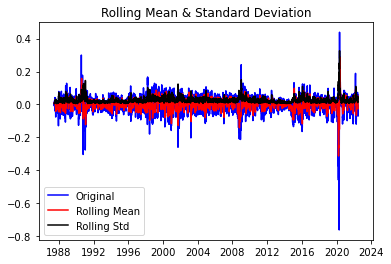

In [11]:
#Determine rolling statistics
movingAverage = log_transformed.rolling(window=12).mean()
movingSTD = log_transformed.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(log_transformed, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# plotting stationary time series data
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Timeshift transformation

In [12]:
logScale

,Price
Date,
1987-05-20,2.924773
1987-05-21,2.915064
1987-05-22,2.920470
1987-05-25,2.923162
1987-05-26,2.924773
...,...
2022-06-21,4.774997
2022-06-22,4.749617
2022-06-23,4.740575


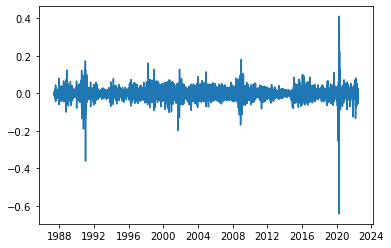

In [13]:
# transforming the dataset
Shifting = logScale - logScale.shift()

# plotting 
plt.plot(Shifting)
plt.show()

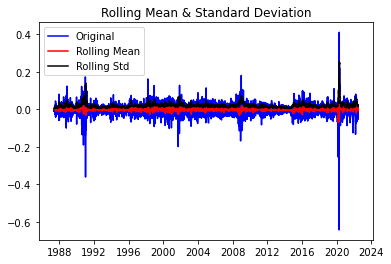

In [14]:
#Determine rolling statistics
movingAverage = Shifting.rolling(window=12).mean()
movingSTD = Shifting.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(Shifting, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# Labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Building ARIMA Model

In [15]:
###logScale = np.log(df)
### Shifting = logScale - logScale.shift()

C:\Users\91775\anaconda3\envs\forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91775\anaconda3\envs\forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91775\anaconda3\envs\forecasting\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


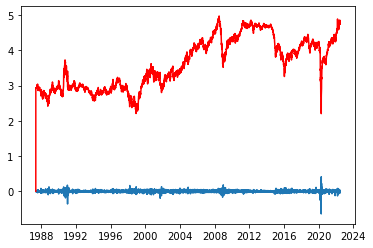

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(logScale, order=(1,1,1))

# fiting the model
results_ARIMA = model.fit()

# plotting the results
plt.plot(Shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

In [17]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8911
Model:                 ARIMA(1, 1, 1)   Log Likelihood               20042.072
Date:                Tue, 19 Jul 2022   AIC                         -40078.144
Time:                        10:43:05   BIC                         -40056.859
Sample:                             0   HQIC                        -40070.898
                               - 8911                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1195      0.413     -0.289      0.772      -0.928       0.689
ma.L1          0.1312      0.413      0.318      0.751      -0.678       0.941
sigma2         0.0007    1.8e-06    361.828      0.0

# Predictions and reverse transformation

In [18]:
results_ARIMA.fittedvalues

Date
1987-05-20    0.000000
1987-05-21    2.924773
1987-05-22    2.914951
1987-05-25    2.920548
1987-05-26    2.923183
                ...   
2022-06-21    4.772789
2022-06-22    4.775025
2022-06-23    4.749315
2022-06-24    4.740508
2022-06-27    4.765544
Length: 8911, dtype: float64

In [19]:
# making predictions
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)

#Convert to cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()

# reversing the transformation to original data
predictions_ARIMA_log = pd.Series(logScale['Price'].iloc[0], index=logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value=0)

# printing heading 
predictions_ARIMA_log.head()

Date
1987-05-20     2.924773
1987-05-21     5.849546
1987-05-22     8.764497
1987-05-25    11.685045
1987-05-26    14.608228
dtype: float64

In [20]:
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-06-21,118.51
2022-06-22,115.54
2022-06-23,114.50


In [21]:
predictions_ARIMA_log

Date
1987-05-20        2.924773
1987-05-21        5.849546
1987-05-22        8.764497
1987-05-25       11.685045
1987-05-26       14.608228
                  ...     
2022-06-21    32308.613294
2022-06-22    32313.388319
2022-06-23    32318.137634
2022-06-24    32322.878142
2022-06-27    32327.643687
Length: 8911, dtype: float64

C:\Users\91775\anaconda3\envs\forecasting\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


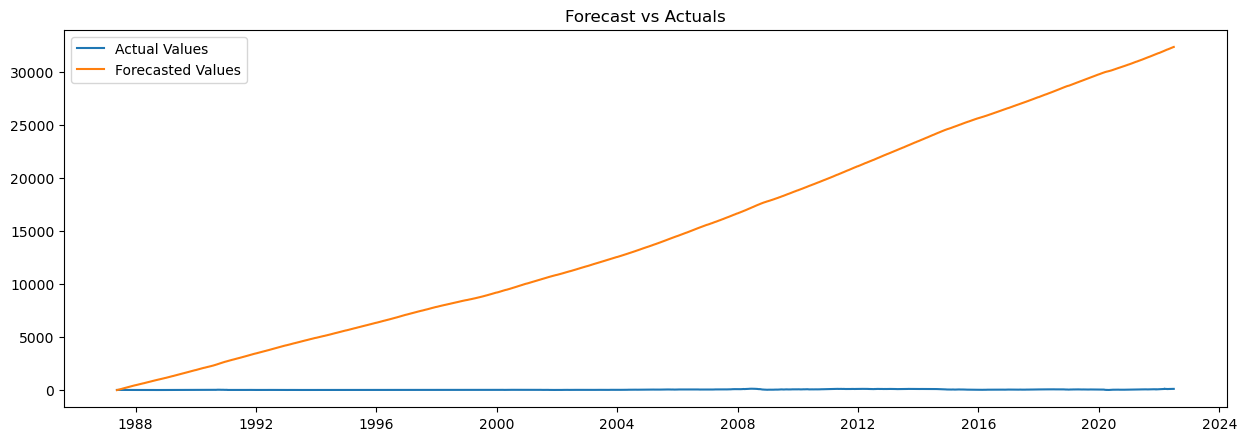

In [22]:
# Inverse of log is exp 
predictions_ARIMA = np.exp(predictions_ARIMA_log)
# Plot
plt.figure(figsize=(15,5), dpi=100)
# plotting actual values
plt.plot(df,label='Actual Values')
plt.plot(predictions_ARIMA_log,label='Forecasted Values')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=10)
plt.show();

In [23]:
predictions_ARIMA

Date
1987-05-20    1.863000e+01
1987-05-21    3.470769e+02
1987-05-22    6.402841e+03
1987-05-25    1.187820e+05
1987-05-26    2.209392e+06
                  ...     
2022-06-21             inf
2022-06-22             inf
2022-06-23             inf
2022-06-24             inf
2022-06-27             inf
Length: 8911, dtype: float64

In [25]:
results_ARIMA

In [31]:
# predict future points ( for upcomung years)
from statsmodels.graphics.tsaplots import plot_predict
results_ARIMA.plot_predict(7000, 10000) 

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df, predictions_ARIMA))
print(rms)